Importing Libraries

In [ ]:
import numpy as np #making numpy arrays
import pandas as pd #making data frame(structured table)
import matplotlib.pyplot as plt #used for making plots and graphs
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting data into train test split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #evaluate our moder to find error score and accuracy score and all



Data Collection and processing

In [ ]:
#loading csv data to a pandas DataFrame
gold_data = pd.read_csv('/gld_price_data.csv')

In [ ]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print the last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic info on the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.positive
2.negative

In [ ]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Now calculate the correlation, excluding the 'Date' column
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

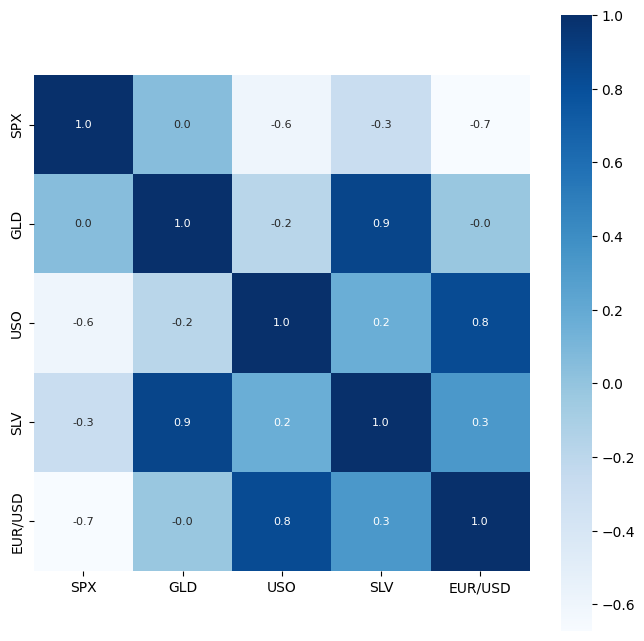

In [ ]:
#constructing a heapmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True , square =True,fmt ='.1f',annot = True,annot_kws={'size':8},cmap='Blues' )

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-261030691e78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

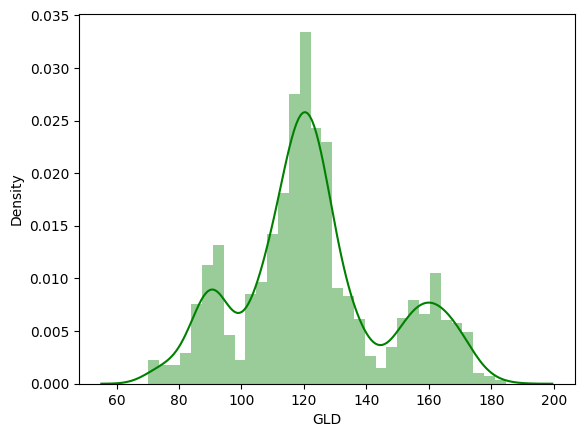

In [ ]:
#check the distribution of the gold Price
sns.distplot(gold_data['GLD'], color = 'green')

Splitting the feature(spx , uso,slv,ep/usd) and the target variable(Gld) and drop the date column

In [ ]:
x = gold_data.drop(['Date','GLD'],axis = 1) #while dropping a column use axis = 1 and for row use axis =0
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators =100)

In [ ]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.67889954  82.08249971 116.03840015 127.75230074 120.86610129
 154.70039748 150.79559869 126.10130017 117.38359892 125.906801
 116.46880133 171.64440077 141.85799836 167.62969894 115.0455
 117.80750032 139.58770309 170.33810139 158.84820232 158.73209902
 155.09830008 125.2625003  176.27119986 157.67330356 125.22870048
  93.67799949  77.6191003  120.57850008 119.16219985 167.61019996
  88.31740066 125.47220022  91.24270094 117.64120028 121.12979898
 136.45600118 115.59190111 115.47880085 147.8424992  107.17930117
 104.68200263  87.28459796 126.53400061 117.96530005 153.39539875
 119.52339993 108.27910024 108.08919876  93.32550055 127.10579777
  74.77560044 113.69799933 121.38490025 111.27599937 118.88679878
 120.7272994  159.01300042 168.26120145 147.03249679  86.02579882
  94.18390034  86.91819896  90.69609998 118.90390077 126.36020058
 127.71990007 170.43110039 122.28469942 117.44409898  98.57950007
 168.58150179 142.72719841 132.1652022  121.15350204 120.68359939
 119.96670057 11

In [ ]:
#R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.9887444451548479


compare the actual values and predicted values in Plot

In [ ]:
y_test = list(y_test)

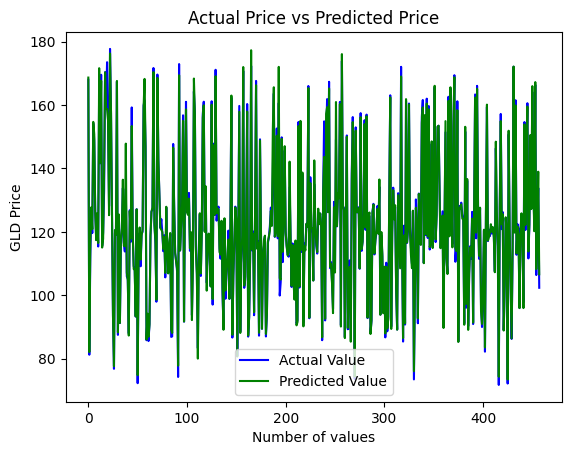

In [ ]:
plt.plot(y_test,color = 'blue',label = 'Actual Value')
plt.plot(test_data_prediction,color = 'green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
import joblib

# Replace 'model' with your trained model variable name
joblib.dump(regressor, 'gold_price_model.pkl')


['gold_price_model.pkl']

In [ ]:
from google.colab import files
files.download('gold_price_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install joblib


In [ ]:
print(x_train.columns)


Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')
